# Principal Component Analysis

### Let's get to the most important parts of this data

![](./img/PCA.png)

## Starting Off

Currently when you have a lot of potential features to use in a model, how are you deciding which features to use in your final model, both the number and the specific features?

What are some advantages and disadvantages of this approach?

And how on earth do you handle mutlicolinearity in a dataset?

### Objectives

By the end of this lesson students will be able to:
- Describe PCA and its role in modeling
- Apply PCA to datasets
- Understand how to select the relevant components to keep

Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data.

![](./img/machine_learning.png)

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA).
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.



## The Curse of Dimensionality

As the dimensionality of the feature space increases, the number of configurations can grow exponentially, and the number of configurations covered by an observation decreases. 

As we add more dimensions we also increase the processing power we need to analyze the data, and we also increase the amount of training data required to make meaningful models.

### 1-d Space

![1d](https://cdn-images-1.medium.com/max/1600/1*V4g_LzDA0QhWrVbRJqSNLQ.png)

### 2d Space
![2d](https://cdn-images-1.medium.com/max/1600/1*m5i7BqDLiZ8t1tyQx8xWHQ.png)

### 3d Space

![3d](https://cdn-images-1.medium.com/max/1600/1*sKj4h8S1DRV7Phf22ycAbg.png)

As the number of dimensions increases what happens to the nubmer of observations needed to cover that space?

### Hughes Phenomenon

Hughes Phenomenon shows that as the number of features increases, the classifier’s performance increases as well until we reach the optimal number of features. Adding more features based on the same size as the training set will then degrade the classifier’s performance.

![hughes](https://cdn-images-1.medium.com/max/1600/1*Ts2X2ow29QLDEeLvSE14Ew.png)

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible **unsupervised method** for **dimensionality reduction** in data.
Its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider the following 200 points:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

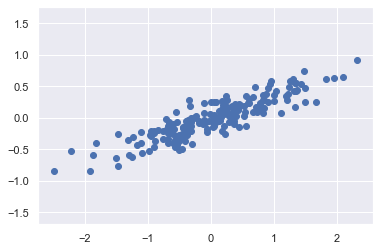

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables.
The problem setting here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

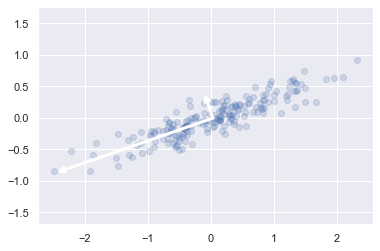

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=3,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

The 1st component is always a vector that contains the most information(i.e. that explains the most variance in the data).

The 2nd principal component is the vector which contains the 2nd most information while being orthoganal (at a right angle) to the first component.

If we plot these principal components beside the original data, we see the plots shown here:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-PCA-rotation.png?raw=1)


This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

[Deep Dive on how the axes is determined](https://www.youtube.com/watch?v=_UVHneBUBW0)

[The linear algebra intuition behind this](https://www.youtube.com/watch?v=PFDu9oVAE-g)

[Let's demo a concept](https://www.desmos.com/calculator/tpahiv1skb)

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

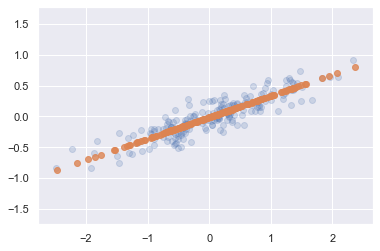

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### Another view of what happened
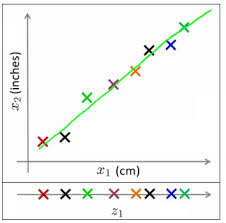

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits data .

We start by loading the data:

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [10]:
digits['target'][4]

4

In [11]:
digits['data'][4].reshape((8,8))

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

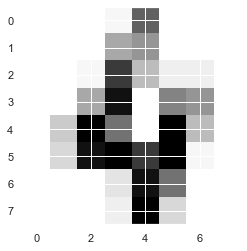

In [12]:
plt.imshow(digits['data'][4].reshape((8,8)), cmap='Greys')

The data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [13]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [14]:
pca.explained_variance_

array([179.0069301 , 163.71774688])

In [15]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

From the `explained_variance_` attribute we can examine the amount of variance explained by each of the selected components. 


The `explained_variance_ratio_` attribute tells us the percentage of variance explained by each of the selected components.




We can now plot the first two principal components of each point to learn about the data:

In [16]:
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'yellow', 'purple', 'cyan',
                                  'orange', 'pink', 'brown', 'black', 'teal'])

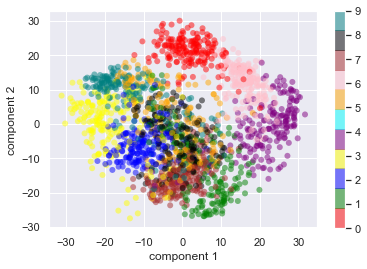

In [17]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=cmap
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an **unsupervised manner**—that is, **without reference to the labels**.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.  Two of the most common ways to approach the selection of components are the following:

1.  Select a number of components that explain a sufficiently large proportion of variance (e.g., 80 % of the variance)

2. Examine a plot of the explained variance and look for an "elbow" in the curve where the explained variance stops growing fast.

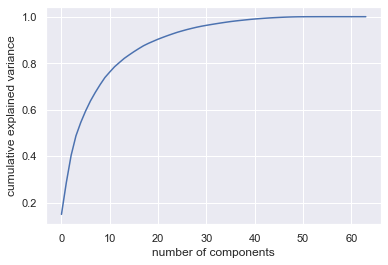

In [18]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

In [19]:
pca.explained_variance_ratio_[:30].sum()

0.9590854042457173

Below we can run another PCA model this time extracting the components such that the amount of variance that needs to be explained is greater 95%.

In [20]:
pca = PCA(.80)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
len(pca.explained_variance_ratio_)

13

In [22]:
pca.explained_variance_ratio_.sum()

0.802895776104032

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

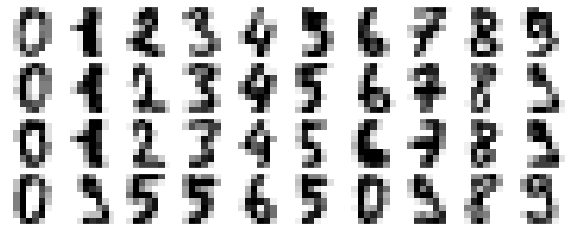

In [23]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

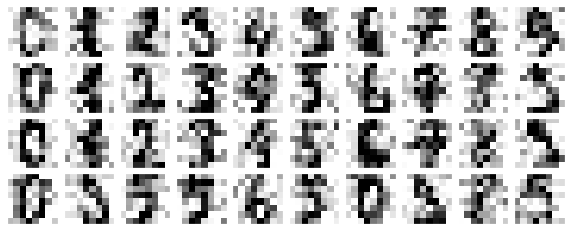

In [24]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [25]:
pca = PCA().fit(noisy)
pca.n_components_

64

In [26]:
pca.explained_variance_ratio_[:12].sum()

0.5148965943078996

In [27]:
pca = PCA(.5).fit(noisy)
pca.n_components_

12

In [28]:
pca.explained_variance_ratio_.sum()

0.5148965943078996

In [29]:
pca.components_[:1]

array([[ 4.40262192e-03, -1.88464545e-02, -2.20344210e-01,
        -1.56827437e-01, -2.22348964e-02, -8.75998175e-02,
        -2.19062996e-03,  1.00913672e-02,  4.86825727e-04,
        -1.24273423e-01, -2.56972741e-01,  1.55855966e-01,
        -3.96804404e-02, -1.94472873e-01, -1.02311160e-02,
         6.89238483e-04, -1.03480103e-02, -8.02045160e-02,
         6.03957543e-02,  2.18120607e-01, -1.52599568e-01,
        -1.52549388e-01,  4.13131361e-02,  8.82154398e-03,
         4.11405265e-03,  6.47709991e-02,  2.47622264e-01,
        -1.77423947e-02, -1.83065358e-01, -4.27812495e-02,
         4.03455999e-02, -1.18623990e-02, -1.34212224e-03,
         1.57285131e-01,  3.61926575e-01,  1.90965920e-01,
         1.21718270e-01,  4.31913449e-02,  2.05357365e-02,
         9.21741628e-03,  1.24657131e-02,  9.23035131e-02,
         2.82126915e-01,  2.51606838e-01,  2.25553351e-01,
         1.11812919e-02, -3.35978836e-02,  1.33405641e-02,
         1.53354954e-04, -1.12003708e-02, -7.97670875e-0

Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

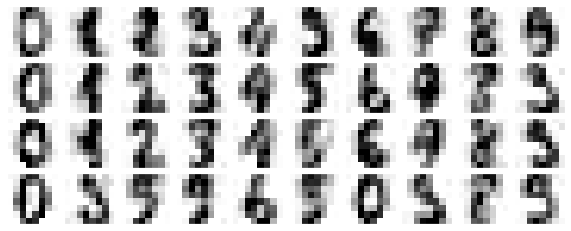

In [30]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### Using components for modeling
Now we can use our 12 best components to classify our digits using Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
pca = PCA(12)
X_components = pca.fit_transform(digits.data)
lr = LogisticRegression()
lr.fit(X_components, digits.target)
lr.score(X_components, digits.target)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9571508069003896

In [32]:
#using the original data
X = digits.data
lr.fit(X, digits.target)
lr.score(X, digits.target)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Principal Component Analysis Summary

We have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.

### Strengths
- Effective in a wide variety of contexts and disciplines.
- Offers a straightforward and efficient path to gaining insight into high-dimensional data.
- Can reduce overfitting.
- Removed highly correlated variables.

### Weaknesses

- Highly affected by outliers in the data.
- Newly created components lose their interpretability.
- You must standardize your data before fitting PCA.


### Other variations
Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.
``RandomizedPCA``, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while ``SparsePCA`` introduces a regularization term (see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb)) that serves to enforce sparsity of the components.

In the following sections, we will look at other unsupervised learning methods that build on some of the ideas of PCA.

## Your Turn!!  Practice on new data set

Let's practice PCA on the [glass dataset](https://raw.githubusercontent.com/p-sama/Glass-Classification/master/glass.csv).  


The columns in this dataset are:

- RI: refractive index
- Na: Sodium
- Mg: Magnesium
- Al: Aluminum
- Si: Silica
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Type of glass (Target label), values 1-6 below:
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. containers
5. tableware
6. headlamps



**Complete the following with your group.**


1. Run a random forest classifier with `max_depth`=5  on the original dataset and print out appropriate classification metrics
2. Conduct PCA to reduce the dimensionality of your features.  Determine the number of features using an appropriate method as discussed in today's lecture.
3. Re-run your random forest classifier using your components.
4. Compare the models.  Were you more "successful" in your predictions with the reduced features?
5. **BONUS**: Use a pipeline to perform the preprocessing steps as well as the modeling


In [34]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/p-sama/Glass-Classification/master/glass.csv')

In [35]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [37]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(max_depth=5)

In [46]:
X, y = df.drop(columns='Type'), df.Type

In [50]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
from sklearn.metrics import classification_report

In [54]:
c_i = classification_report
y_pred = rfc.predict(X)

In [57]:
print(c_i(y, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.94      0.89        70
           2       0.88      0.91      0.90        76
           3       0.88      0.41      0.56        17
           5       1.00      0.92      0.96        13
           6       1.00      1.00      1.00         9
           7       1.00      0.97      0.98        29

    accuracy                           0.89       214
   macro avg       0.93      0.86      0.88       214
weighted avg       0.90      0.89      0.89       214



In [58]:
pca_2 = PCA()

##  Additional Resources

[A detailed presentation on PCA](http://luthuli.cs.uiuc.edu/~daf/courses/CS-498-DAF-PS/Lecture%209%20-%20PCA.pdf)

[Interactive tool for PCA](http://setosa.io/ev/principal-component-analysis/)

[For noise cancellation example](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html)

[Kernel PCA vs PCA vs ICA](https://towardsdatascience.com/kernel-pca-vs-pca-vs-ica-in-tensorflow-sklearn-60e17eb15a64)

[Comparison of PCA and KPCA](https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py)

[Principal Component Analysis in 3 Simple Steps](https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#1---eigendecomposition---computing-eigenvectors-and-eigenvalues)

[How to compute PCA Loadings and the Loading Matrix with scikit-learn](https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html)